In [7]:
from GG_mthesis import *
%matplotlib inline

In [8]:
df = pd.read_csv('data/03_processed/SOCAT/data_gridded_SSH', index_col=0)

In [9]:
df

,rho,lon,lat,time,bx,adt,sla
0,1027.111325,-55.036099,-60.186746,2008-04-02 12:37:59.443732,2.420470e-08,-1.139938,0.015919
1,1027.112993,-55.050653,-60.181407,2008-04-02 12:42:02.501421,1.592764e-08,-1.138465,0.016880
2,1027.113652,-55.065062,-60.175973,2008-04-02 12:46:09.843105,6.301471e-09,-1.137017,0.017804
3,1027.114112,-55.079467,-60.170537,2008-04-02 12:50:17.165555,4.391614e-09,-1.135580,0.018702
4,1027.114587,-55.094108,-60.165262,2008-04-02 12:54:28.593366,4.531314e-09,-1.134128,0.019593
...,...,...,...,...,...,...,...
101663,1026.866556,-57.843450,-55.485430,2018-11-06 09:04:17.604416,3.159840e-12,0.207570,0.153771
101664,1026.857450,-57.911272,-55.501976,2018-11-06 09:30:52.863982,3.509134e-12,0.219447,0.168609
101665,1026.857449,-57.926199,-55.505041,2018-11-06 09:36:37.674582,4.413789e-12,0.221792,0.171534
101666,1026.927593,-57.993488,-55.509729,2018-11-06 21:50:48.685594,1.225301e-07,0.238105,0.188250


In [10]:
ds_mdt = xr.open_dataset('data/01_raw/cnes_obs-sl_glo_phy-mdt_my_0.125deg_P20Y_1669032457824.nc', engine='netcdf4')
ds_mdt = ds_mdt.sel(latitude=slice(-63,-54), longitude=slice(-76,-51)).isel(time=0)
ds_mdt['mdt_diff_lat'] = ds_mdt['mdt'].diff('latitude')
ds_mdt_interpolated = ds_mdt.interp(longitude=('z', df['lon']), latitude= ('z', df['lat']), method='linear')
df_mdt = ds_mdt_interpolated[['mdt', 'mdt_diff_lat']].to_dataframe()
df['mdt'] = df_mdt['mdt']
df['mdt_diff_lat'] = df_mdt['mdt_diff_lat']

In [11]:
df

,rho,lon,lat,time,bx,adt,sla,mdt,mdt_diff_lat
0,1027.111325,-55.036099,-60.186746,2008-04-02 12:37:59.443732,2.420470e-08,-1.139938,0.015919,-1.103449,-0.001878
1,1027.112993,-55.050653,-60.181407,2008-04-02 12:42:02.501421,1.592764e-08,-1.138465,0.016880,-1.103051,-0.001829
2,1027.113652,-55.065062,-60.175973,2008-04-02 12:46:09.843105,6.301471e-09,-1.137017,0.017804,-1.102667,-0.001791
3,1027.114112,-55.079467,-60.170537,2008-04-02 12:50:17.165555,4.391614e-09,-1.135580,0.018702,-1.102257,-0.001683
4,1027.114587,-55.094108,-60.165262,2008-04-02 12:54:28.593366,4.531314e-09,-1.134128,0.019593,-1.101830,-0.001592
...,...,...,...,...,...,...,...,...,...
101663,1026.866556,-57.843450,-55.485430,2018-11-06 09:04:17.604416,3.159840e-12,0.207570,0.153771,0.105094,0.031297
101664,1026.857450,-57.911272,-55.501976,2018-11-06 09:30:52.863982,3.509134e-12,0.219447,0.168609,0.101788,0.030007
101665,1026.857449,-57.926199,-55.505041,2018-11-06 09:36:37.674582,4.413789e-12,0.221792,0.171534,0.101271,0.029773
101666,1026.927593,-57.993488,-55.509729,2018-11-06 21:50:48.685594,1.225301e-07,0.238105,0.188250,0.101158,0.029215


In [12]:
bx_cat = (df['bx'] > np.percentile(df['bx'], 95)).astype(int)

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


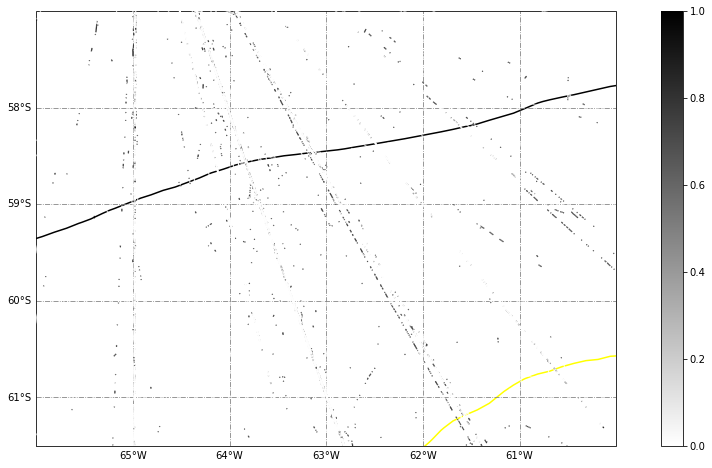

In [13]:
from GG_mthesis.d01_data.processing import rmap 
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=projection)
bx = ax.scatter(df['lon'], df['lat'], c=bx_cat, s=0.1,transform=ccrs.PlateCarree(), zorder=500, cmap='binary',
                #vmax=np.percentile(df['bx'], 95), vmin=np.percentile(df['bx'], 5)
                )
ax.coastlines(zorder=100)
ax.add_feature(cartopy.feature.LAND, color='green', zorder=50)
gl = ax.gridlines(draw_labels=True, linestyle='-.', color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
fig.colorbar(bx)

fronts=rmap.load_fronts('data/01_raw/ACC_FRONTS/PARK/62985.nc')
fronts=rmap.sel_front_region(fronts, lon_min=-70, lon_max=-50, lat_min=-65, lat_max=-55)
s=4
#SAF = ax.plot(fronts.loc['SAF']['longitude'], fronts.loc['SAF']['latitude'],transform=ccrs.PlateCarree(), label='SAF_Park', color='purple')#, s=s)
PF = ax.plot(fronts.loc['PF']['longitude'], fronts.loc['PF']['latitude'], transform=ccrs.PlateCarree(), label='PF_Park', color='black')#, s=s)
SACCF = ax.plot(fronts.loc['SACCF']['longitude'], fronts.loc['SACCF']['latitude'],transform=ccrs.PlateCarree(), label='SACCF_Park', color='yellow')#, s=s)
NB = ax.plot(fronts.loc['NB']['longitude'], fronts.loc['NB']['latitude'],transform=ccrs.PlateCarree(), label='NB_Park', color='red')#, s=s)
SB = ax.plot(fronts.loc['SB']['longitude'], fronts.loc['SB']['latitude'],transform=ccrs.PlateCarree(), label='SB_Park', color='red')#, s=s)
#ax.set_extent([-63.3, -63.5, -58.5, -58.4])
ax.set_extent([-66,-60,-61.5,-57])

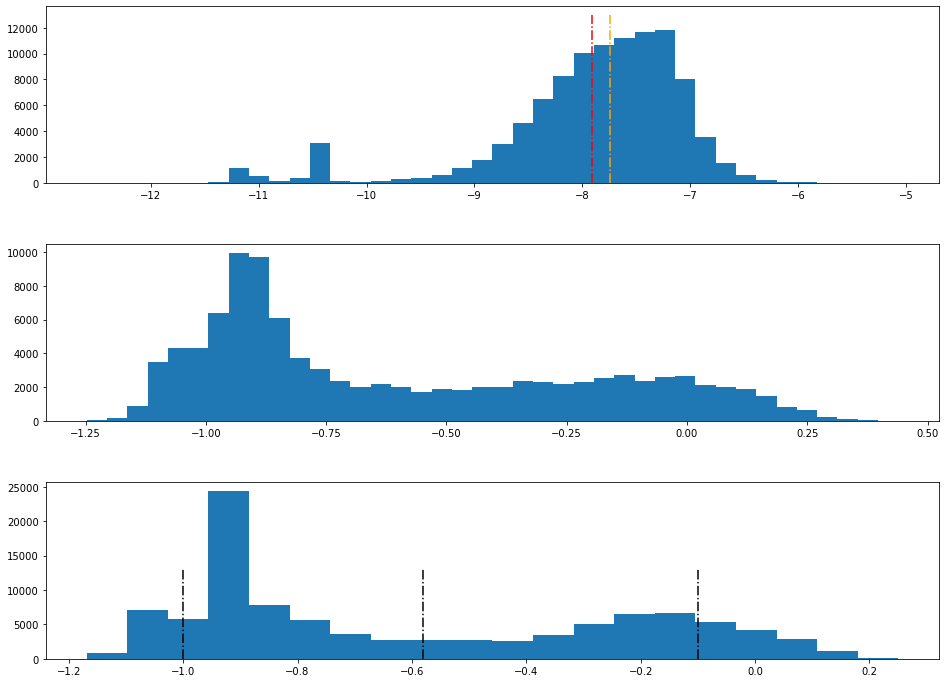

In [14]:
dist_mean = np.log10(df['bx']).mean()
dist_median = np.log10(df['bx']).median()

#Let´s plot bx along the track.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,figsize=(16,12))
plt.subplots_adjust(hspace=0.35)

ax0.hist(np.log10(df['bx']),
         bins=40, #np.arange(200,1001,50),
         #density=True
         )
ax0.vlines(dist_mean, 0, 13000,
           color='red',
           linestyle='-.')
ax0.vlines(dist_median, 0, 13000,
           color='orange',
           linestyle='-.')
#ax0.set_ylim(0,25000)

ax1.hist(df['adt'],
         bins=40, #np.arange(200,1001,50),
         #density=True
         )

ax2.hist(df['mdt'],
         bins=20, #np.arange(200,1001,50),
         #density=True
         )
ax2.vlines(-0.1, 0, 13000,
           color='black',
           linestyle='-.')
ax2.vlines(-0.58, 0, 13000,
           color='black',
           linestyle='-.')
ax2.vlines(-1.0, 0, 13000,
           color='black',
           linestyle='-.')
plt.show()

In [15]:
df

,rho,lon,lat,time,bx,adt,sla,mdt,mdt_diff_lat
0,1027.111325,-55.036099,-60.186746,2008-04-02 12:37:59.443732,2.420470e-08,-1.139938,0.015919,-1.103449,-0.001878
1,1027.112993,-55.050653,-60.181407,2008-04-02 12:42:02.501421,1.592764e-08,-1.138465,0.016880,-1.103051,-0.001829
2,1027.113652,-55.065062,-60.175973,2008-04-02 12:46:09.843105,6.301471e-09,-1.137017,0.017804,-1.102667,-0.001791
3,1027.114112,-55.079467,-60.170537,2008-04-02 12:50:17.165555,4.391614e-09,-1.135580,0.018702,-1.102257,-0.001683
4,1027.114587,-55.094108,-60.165262,2008-04-02 12:54:28.593366,4.531314e-09,-1.134128,0.019593,-1.101830,-0.001592
...,...,...,...,...,...,...,...,...,...
101663,1026.866556,-57.843450,-55.485430,2018-11-06 09:04:17.604416,3.159840e-12,0.207570,0.153771,0.105094,0.031297
101664,1026.857450,-57.911272,-55.501976,2018-11-06 09:30:52.863982,3.509134e-12,0.219447,0.168609,0.101788,0.030007
101665,1026.857449,-57.926199,-55.505041,2018-11-06 09:36:37.674582,4.413789e-12,0.221792,0.171534,0.101271,0.029773
101666,1026.927593,-57.993488,-55.509729,2018-11-06 21:50:48.685594,1.225301e-07,0.238105,0.188250,0.101158,0.029215


In [16]:
df_bx_rolling = df_90.rolling(20).mean()
df_90 = df[df['bx'] >= np.percentile(df['bx'], 98)]

fig, (ax0, ax1) = plt.subplots(figsize=(16,12), nrows=2, sharex=True)
ax0.scatter(df_90['mdt'], df_90['bx'])
ax1.scatter(df_bx_rolling['mdt'], df_bx_rolling['bx'])
for ax in [ax0, ax1]:
    ax.vlines(-0.1, 0, 1E-6,
            color='black',
            linestyle='-.')
    
    ax.vlines(-0.58, 0, 1E-6,
        color='black',
        linestyle='-.')

    ax.vlines(-1.0, 0, 1E-6,
    color='black',
    linestyle='-.')

NameError: name 'df_90' is not defined

In [ ]:
df['bx_norm'] = df['bx']-df['bx'].mean()

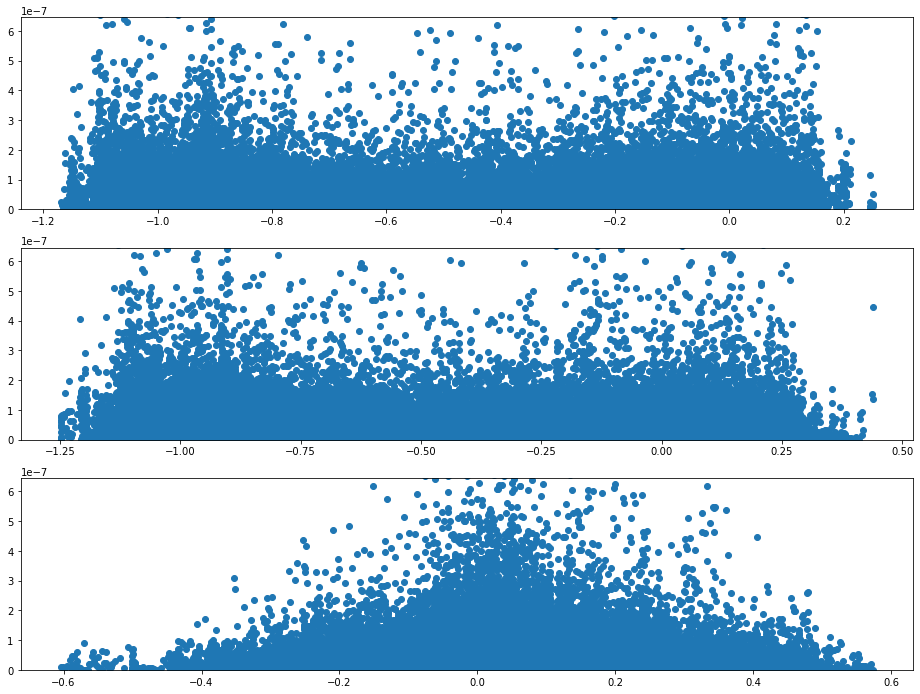

In [17]:
df_bx_rolling = df.rolling(2).var()
df_90 = df[df['bx'] >= np.percentile(df['bx'], 98)]

fig, (ax0, ax1, ax2) = plt.subplots(figsize=(16,12), nrows=3)
ax0.scatter(df['mdt'], df['bx'])
ax1.scatter(df['adt'], df['bx'])
ax2.scatter(df['sla'], df['bx'])
axes = [ax0, ax1, ax2]
for ax in axes:
    ax.set_ylim(0, np.percentile(df['bx'],99.9))


## K-Means MDT

In [18]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [19]:
df = df.dropna(how='any')

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['mdt','bx']])

kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=200,
    max_iter=500
)

In [21]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=200)

In [22]:
kmeans.inertia_

86156.73531151602

In [23]:
kmeans.cluster_centers_

array([[-0.75466008, -0.09346437],
       [ 0.22582295,  4.52413043],
       [ 1.12083851, -0.03450781]])

In [24]:
kmeans.n_iter_

25

In [25]:
y_predicted = kmeans.fit_predict(scaled_features)

In [26]:
df['cluster'] = y_predicted

C:\Users\gian_\AppData\Local\Temp/ipykernel_15576/3490658694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


In [27]:
scaled_features

array([[-1.35542257, -0.16763466],
       [-1.35435229, -0.27881068],
       [-1.35331886, -0.40810774],
       ...,
       [ 1.88186962, -0.49268871],
       [ 1.88156768,  1.15305545],
       [ 2.05106147, -0.37237656]])

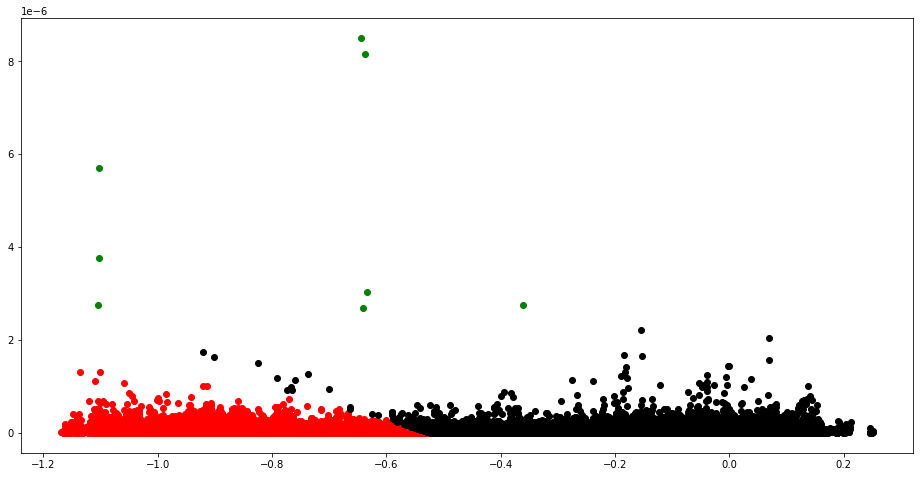

In [28]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
#df4 = df[df['cluster'] == 3]
#df5 = df[df['cluster'] == 4]



fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['mdt'], df1['bx'], color='green')
ax.scatter(df2['mdt'], df2['bx'], color='red')
ax.scatter(df3['mdt'], df3['bx'], color='black')
#ax.scatter(df4['mdt'], df4['bx'], color='yellow')
#ax.scatter(df5['mdt'], df5['bx'], color='purple')



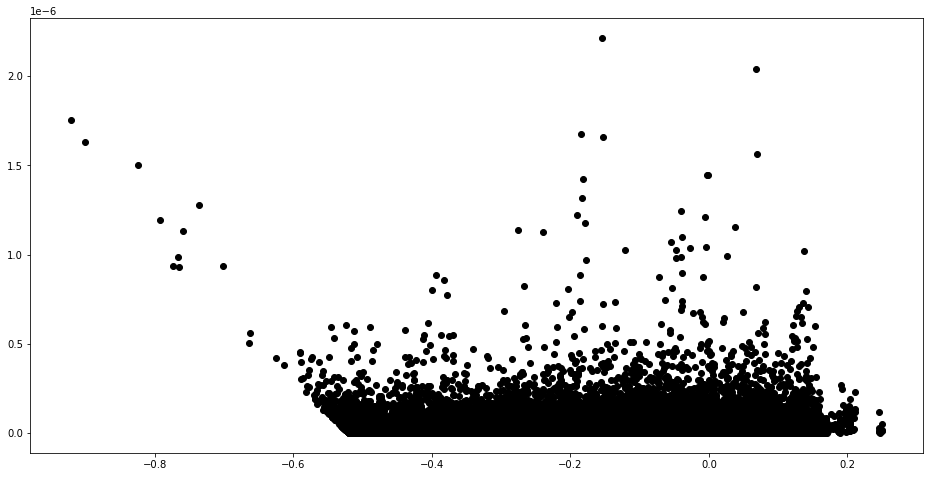

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3['mdt'], df3['bx'], color='black')

(0.0, 1e-06)

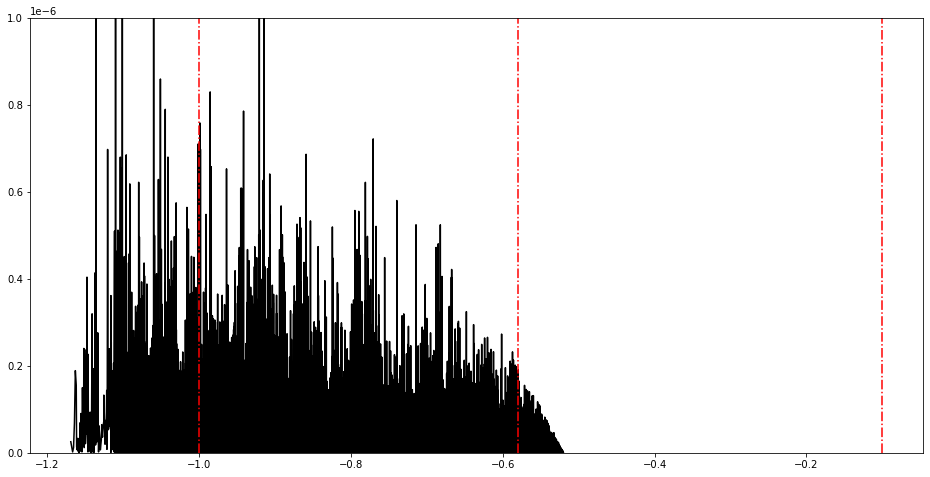

In [30]:
dataframe = df2.sort_values('mdt')
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(dataframe['mdt'], dataframe['bx'], color='black')
ax.vlines(-0.1, 0, 6E-6,
    color='red',
    linestyle='-.')
ax.vlines(-0.58, 0, 6E-6,
    color='red',
    linestyle='-.')
ax.vlines(-1.0, 0, 6E-6,
    color='red',
    linestyle='-.')
ax.set_ylim(0,1E-6)

## K-Means MDT grad

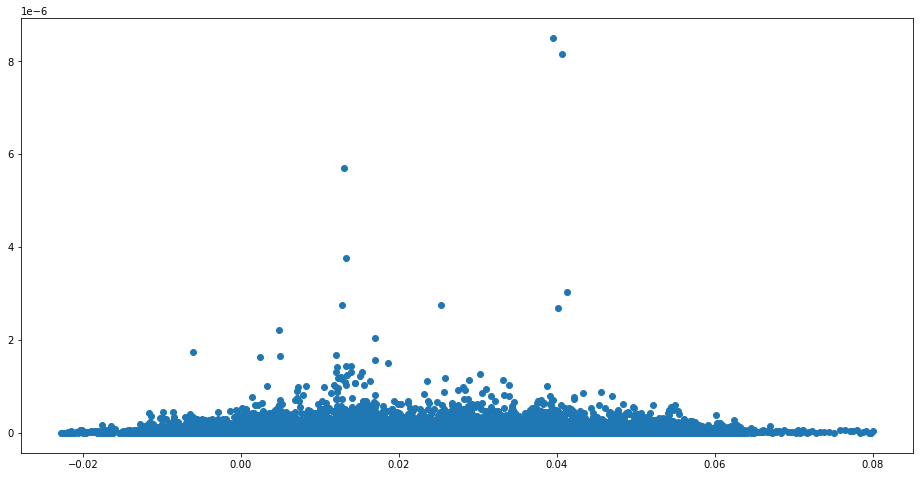

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['mdt_diff_lat'], df['bx'])

In [32]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = df.dropna(how='any')

var1 = 'mdt_diff_lat'
var2 = 'bx'
n_clusters = 3
n_init = 200
max_iter = 500

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[[var1,var2]])

kmeans = KMeans(
    init='random',
    n_clusters=n_clusters,
    n_init=n_init,
    max_iter=max_iter
)

y_predicted = kmeans.fit_predict(scaled_features)

df['cluster'] = y_predicted

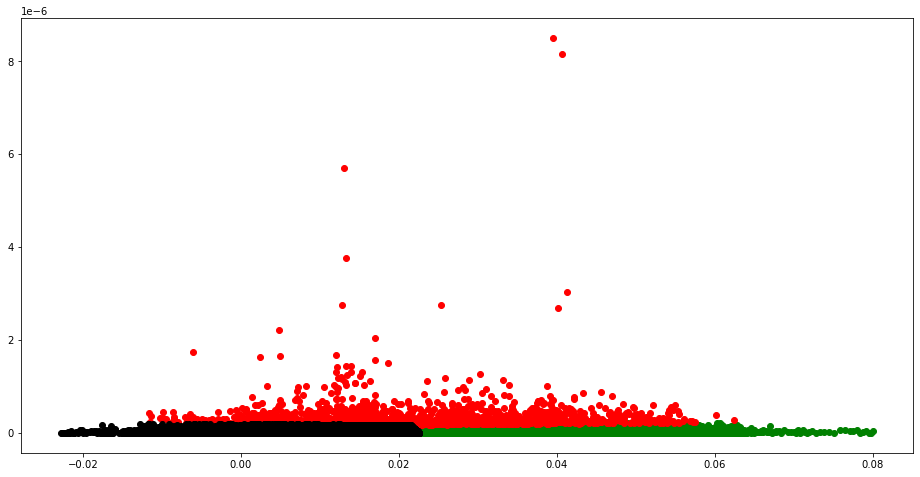

In [33]:
dataset = df

df1 = dataset[dataset['cluster'] == 0]
df2 = dataset[dataset['cluster'] == 1]
df3 = dataset[dataset['cluster'] == 2]
#df4 = df[df['cluster'] == 3]
#df5 = df[df['cluster'] == 4]


fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['mdt_diff_lat'], df1['bx'], color='green')
ax.scatter(df2['mdt_diff_lat'], df2['bx'], color='red')
ax.scatter(df3['mdt_diff_lat'], df3['bx'], color='black')
#ax.scatter(df4['mdt'], df4['bx'], color='yellow')
#ax.scatter(df5['mdt'], df5['bx'], color='purple')

## K-Means ADT

In [34]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['adt','bx']])

kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=200,
    max_iter=500
)

In [36]:
y_predicted = kmeans.fit_predict(scaled_features)

In [37]:
df['cluster'] = y_predicted

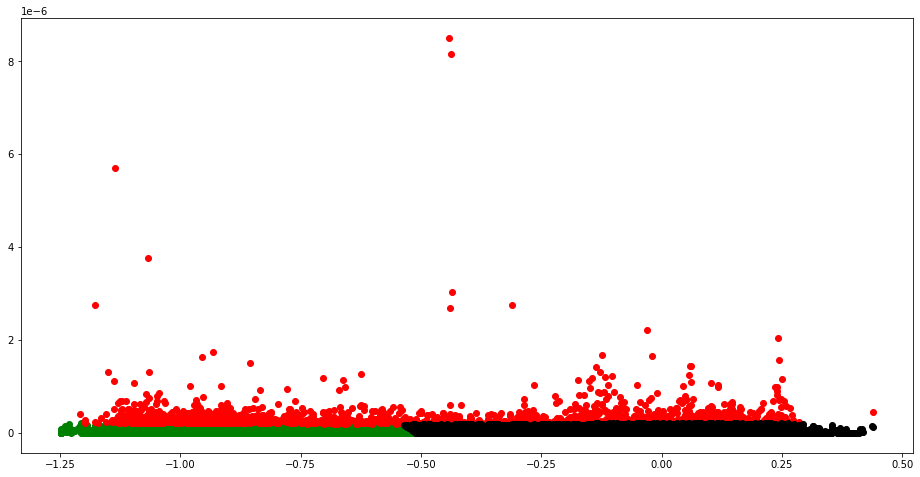

In [38]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
#df4 = df[df['cluster'] == 3]
#df5 = df[df['cluster'] == 4]


fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['adt'], df1['bx'], color='green')
ax.scatter(df2['adt'], df2['bx'], color='red')
ax.scatter(df3['adt'], df3['bx'], color='black')
#ax.scatter(df4['mdt'], df4['bx'], color='yellow')
#ax.scatter(df5['mdt'], df5['bx'], color='purple')


In [42]:
df2['bx']

33        2.402850e-07
59        2.269000e-07
230       2.333995e-07
231       2.260428e-07
350       2.702192e-07
              ...     
101538    2.230850e-07
101610    2.243227e-07
101611    2.905915e-07
101639    2.814821e-07
101641    3.665368e-07
Name: bx, Length: 1546, dtype: float64

(0.0, 1e-06)

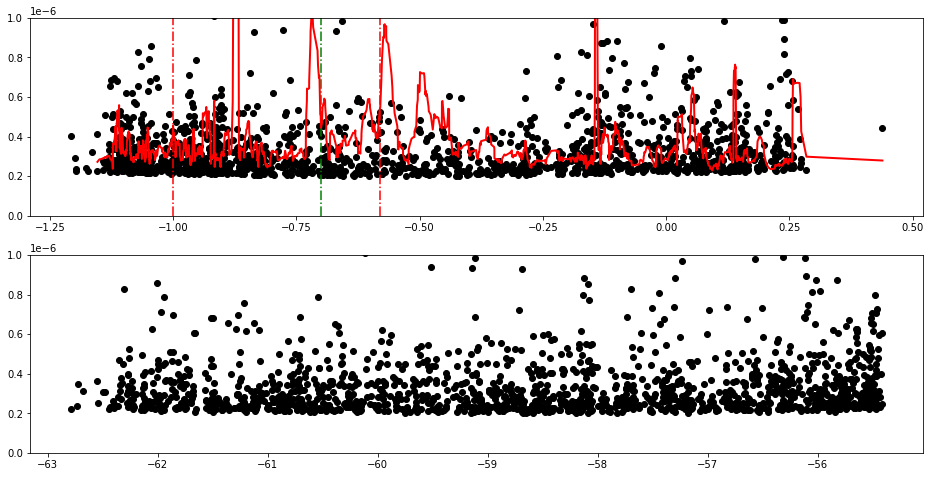

In [88]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(16,8))
ax0.scatter(df2['adt'], df2['bx'], color='black')
ax0.vlines(-0.70, 0, 6E-6,
    color='green',
    linestyle='-.')
ax0.vlines(-0.58, 0, 6E-6,
    color='red',
    linestyle='-.')
ax0.vlines(-1.0, 0, 6E-6,
    color='red',
    linestyle='-.')
ax0.set_ylim(0,1E-6)
y_rolling = df2['bx'].rolling(window=10).mean()
ax0.plot(df2.sort_values('adt')['adt'], y_rolling, color='red', linewidth=2)

#df2_rolling = df2['bx'].rolling(5).mean()
ax1.scatter(df2['lat'], df2['bx'], color='black')

ax1.set_ylim(0,1E-6)

In [211]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['adt','bx']])

kmeans = KMeans(
    init='random',
    n_clusters=5,
    n_init=200,
    max_iter=500
)

In [212]:
y_predicted = kmeans.fit_predict(scaled_features)

In [213]:
df1['cluster'] = y_predicted

C:\Users\gian_\AppData\Local\Temp/ipykernel_7556/688031153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = y_predicted


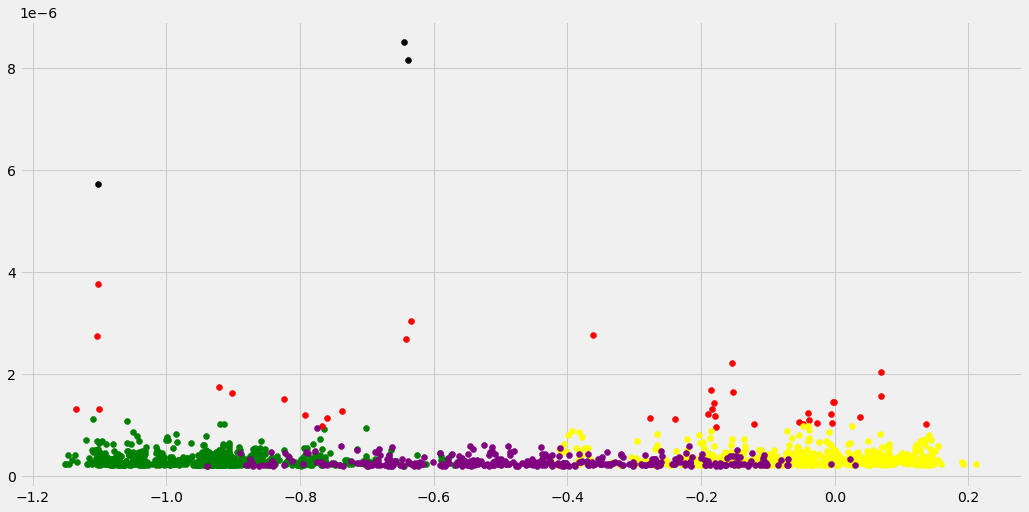

In [214]:
dataset = df1
df4 = dataset[dataset['cluster'] == 0]
df5 = dataset[dataset['cluster'] == 1]
df6 = dataset[dataset['cluster'] == 2]
df7 = dataset[dataset['cluster'] == 3]
df8 = dataset[dataset['cluster'] == 4]


fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df4['mdt'], df4['bx'], color='green')
ax.scatter(df5['mdt'], df5['bx'], color='red')
ax.scatter(df6['mdt'], df6['bx'], color='black')
ax.scatter(df7['mdt'], df7['bx'], color='yellow')
ax.scatter(df8['mdt'], df8['bx'], color='purple')

## K-Means - MDT , log bx

In [215]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()
df_bx = df[['mdt','bx']]
df_bx['bx'] = np.log10(df_bx['bx'])

scaled_features = scaler.fit_transform(df_bx)

kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=200,
    max_iter=500
)

C:\Users\gian_\AppData\Local\Temp/ipykernel_7556/2801066757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bx['bx'] = np.log10(df_bx['bx'])


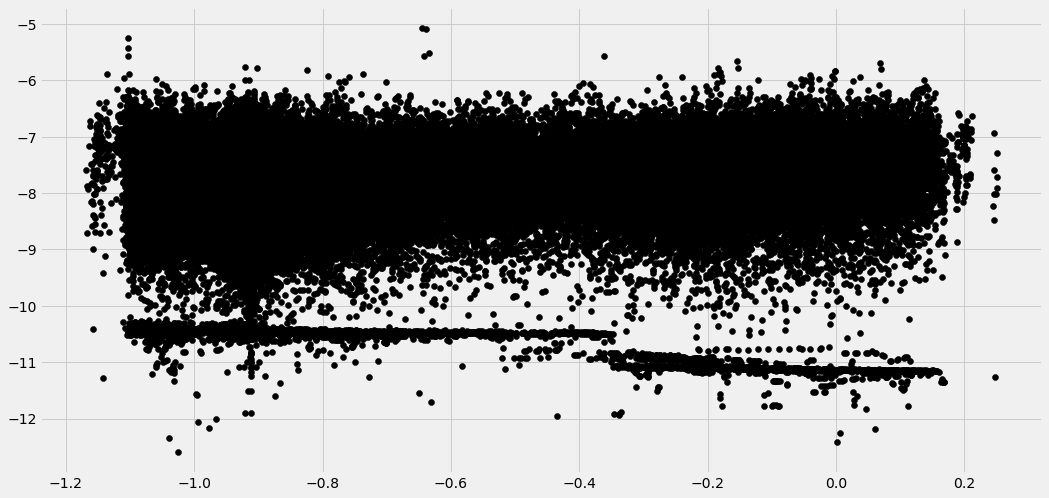

In [220]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_bx['mdt'], df_bx['bx'], color='black')

In [224]:
y_predicted = kmeans.fit_predict(scaled_features)
df_bx['cluster'] = y_predicted

C:\Users\gian_\AppData\Local\Temp/ipykernel_7556/3723308438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bx['cluster'] = y_predicted


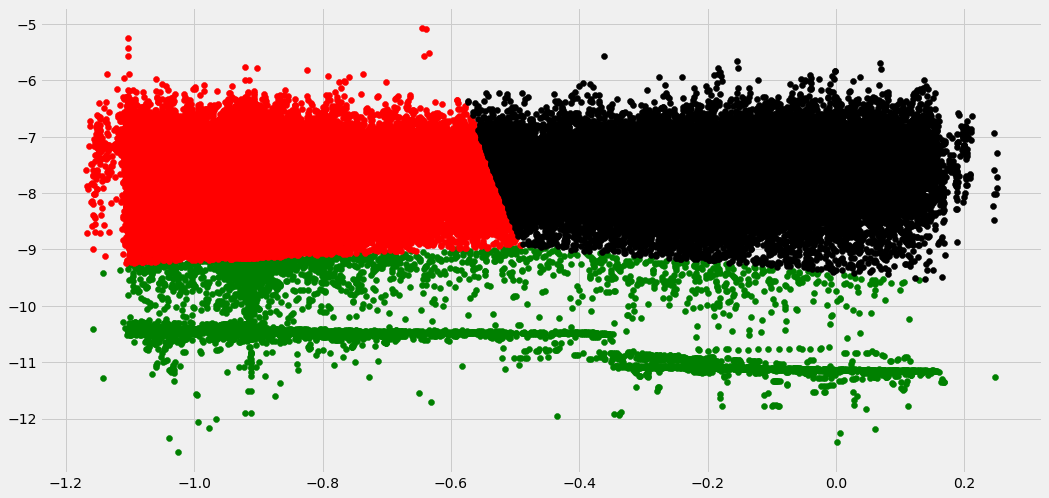

In [225]:
dataset = df_bx
df4 = dataset[dataset['cluster'] == 0]
df5 = dataset[dataset['cluster'] == 1]
df6 = dataset[dataset['cluster'] == 2]
#df7 = dataset[dataset['cluster'] == 3]
#df8 = dataset[dataset['cluster'] == 4]


fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df4['mdt'], df4['bx'], color='green')
ax.scatter(df5['mdt'], df5['bx'], color='red')
ax.scatter(df6['mdt'], df6['bx'], color='black')
#ax.scatter(df7['mdt'], df7['bx'], color='yellow')
#ax.scatter(df8['mdt'], df8['bx'], color='purple')
